In [634]:
# data organization
import pandas as pd

# machine learning tools 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve, auc
import eli5 
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# data viz. 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go

from pdpbox import pdp, info_plots #for partial plots



Import Data

In [635]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

In [636]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,normal,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,normal,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,normal,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,reversible,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,reversible,0


EDA

Check the shape, information on the features, and data types of features

In [637]:
df.shape

(303, 14)

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


Describe the data to understand the average on various variables

In [639]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.594059,9.016370,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.676568,0.468560,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.108911,1.028414,0.0,2.0,3.0,4.0,4.0
trestbps,303.0,131.785479,17.748338,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.547855,52.175933,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.988293,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.194719,23.173368,71.0,132.0,152.0,165.5,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.057756,1.165025,0.0,0.0,0.8,1.6,6.2


The average age is 54.59 and the minimum age is 28. 

<AxesSubplot: xlabel='age', ylabel='Count'>

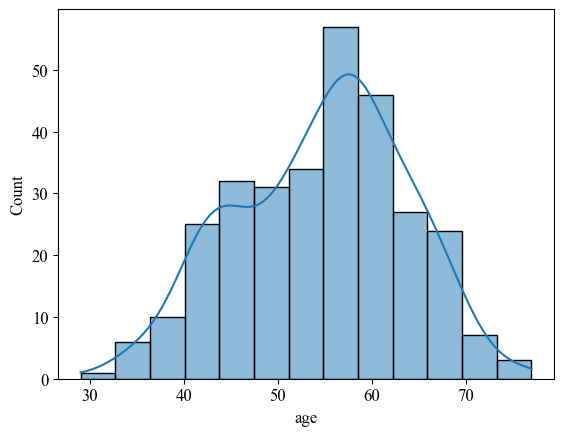

In [640]:
sns.histplot(df['age'], kde=True)

Let's explore the sex column and observe the patterns it plays with other columns.

In [641]:
df['sex'].value_counts()

totalMale = 205
totalFemale = 98
total = totalMale + totalFemale

percentMale = (totalMale/total) * 100
percentFemale = (totalFemale/total) * 100

print(f"Female percentage in the data: {percentFemale:.2f}%")
print(f"Male percentage in the data: {percentMale:.2f}%")


# Plot Same Plot Using Plotly and Coloring this by sex
fig = px.pie(df, names='sex', color='sex')
fig.show()

Female percentage in the data: 32.34%
Male percentage in the data: 67.66%


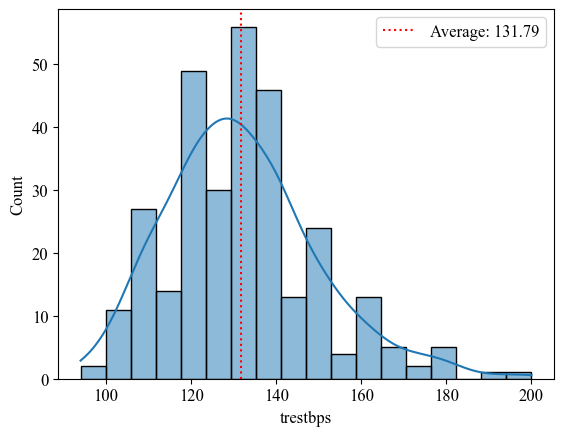

In [642]:
average_BP = df['trestbps'].mean()

sns.histplot(df['trestbps'], kde=True)
plt.axvline(x=average_BP, color='red', linestyle=':', label=f'Average: {average_BP:.2f}')

plt.legend()

plt.show()


Observing the pattern between resting blood pressure and gender of the patient. 

On average, before menopause, women tend to have slightly lower blood pressure than men. However, after menopause, women's blood pressure tends to increase and may surpass that of men.

In [643]:
fig = px.histogram(data_frame=df, x='trestbps', color='sex')
fig.show()

Let's take a look at the chest pain types and what we can find from this data. 

In [644]:
df['cp'].value_counts()

4    142
3     84
2     49
1     24
0      4
Name: cp, dtype: int64

- Value 1: typical angina (chest pain caused by reduced blood flow to the heart muscle due to CAD)
- Value 2: atypical angina (chest pain that doesn't fit the pattern of angina but could be related to heart problems)
- Value 3: non-anginal pain (not caused by reduced blood flow to the heart)
- Value 4: asymptomatic (no chest pain found)

In [645]:
dataframe = df[df['cp'] != 0]

In [646]:
fig = px.histogram(data_frame=df, x='cp', color='sex')
fig.update_xaxes(range=[1, 4])
fig.show()

Cholesterol ranges from 126 to 564. The average is 246.55. The healthy range for total cholesterol is under 200 mg/dL. 

In [647]:
df['chol'].describe().T

count    303.000000
mean     246.547855
std       52.175933
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

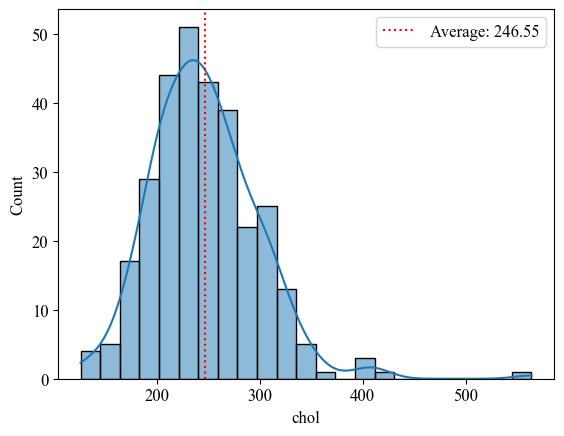

In [648]:
average_chol = df['chol'].mean()

sns.histplot(df['chol'], kde=True)
plt.axvline(x=average_chol, color='red', linestyle=':', label=f'Average: {average_chol:.2f}')

plt.legend()

plt.show()



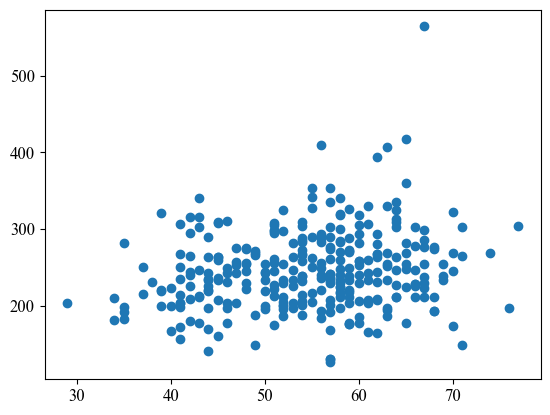

In [649]:
# observe how the age plays a role in chol 
plt.scatter(df['age'],df['chol'])

Resting electrocardiographic results: 
- 0:  normal 
- 1:  having ST-T wave abnormality
- 2:  showing probable or definite left ventricular hypertrophy by Estes' criteria

In [650]:
df['restecg'].describe().T

count    303.000000
mean       0.990099
std        0.988293
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: restecg, dtype: float64

Amongst the data 49.2% of the individuals have normal ECG results. 
However, 48.2% of individuals show probable/definite hypertrophy.

In [651]:
for i in range(3):
    count = df['restecg'].value_counts()[i]
    print("Count for " + str(i) + ": ")
    print(count)



Count for 0: 
149
Count for 1: 
8
Count for 2: 
146


Thalach results = max heart rate achieved
Ranging from 71 to 202 with an average of 149.19.

In [652]:
df['thalach'].describe().T

count    303.000000
mean     149.194719
std       23.173368
min       71.000000
25%      132.000000
50%      152.000000
75%      165.500000
max      202.000000
Name: thalach, dtype: float64

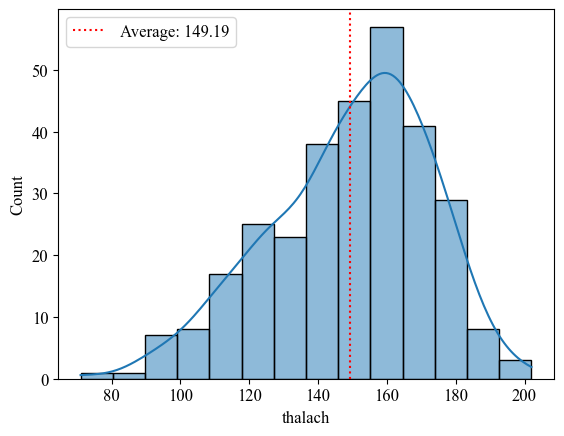

In [653]:
average_thalach = df['thalach'].mean()

sns.histplot(df['thalach'], kde=True)
plt.axvline(x=average_thalach, color='red', linestyle=':', label=f'Average: {average_thalach:.2f}')

plt.legend()

plt.show()



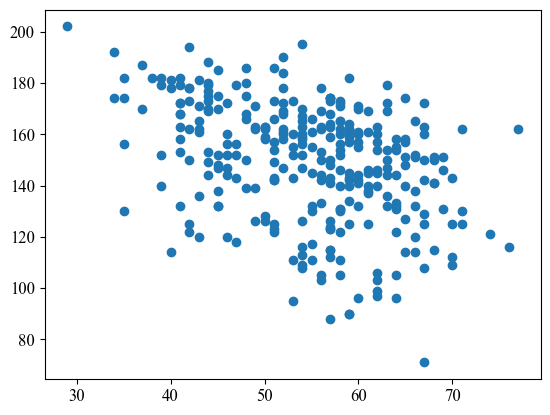

In [654]:
plt.scatter(df['age'],df['thalach'])

Meaning of each value for Thalassemia (blood disorder):
- 3.0: normal
- 6.0: fixed defect
- 7.0: reversable defect

In [655]:
df['thal'].describe().T

count        303
unique         5
top       normal
freq         168
Name: thal, dtype: object

Heart disease diagnosis relies on a blend of observable symptoms and examination findings. The selection of tests is determined by the physician's assessment of the situation. These tests may include electrocardiograms, cardiac CT scans, blood tests, and exercise stress tests.

Risk factors for heart disease include elevated cholesterol, hypertension, diabetes, obesity, familial history, and smoking. Immutable factors such as advancing age and genetic inheritance significantly contribute to the risk. Thalassemia, a hereditary condition, is among the variables in this dataset.

After learning more about the features of the dataset I have decided to change column names to make it easier to understand

In [656]:
df.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "chol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate", "exercise_induced_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia", "target"]

In [657]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'


In [658]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [659]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
chol                         int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate               int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [660]:
dt = pd.get_dummies(df, drop_first=True)

In [661]:
dt.head()

,age,resting_blood_pressure,chol,max_heart_rate,st_depression,num_major_vessels,target,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_2,thalassemia_fixed,thalassemia_normal,thalassemia_reversible
0,63,145,233,150,2.3,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,67,160,286,108,1.5,3,1,1,1,0,...,1,1,0,1,1,0,0,0,1,0
2,67,120,229,129,2.6,2,0,1,1,0,...,1,1,0,1,1,0,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,41,130,204,172,1.4,0,0,0,0,1,...,1,1,0,0,0,1,0,0,1,0


Modeling

In [662]:
X_train, X_test, y_train, y_test = train_test_split(dt.drop('target',1), dt['target'], test_size = .2,random_state = 10)

In [663]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [664]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [665]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [666]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [667]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[40,  6],
       [ 5, 10]], dtype=int64)

The accuracy is a measure of the fraction of predictions that the model got correct. Here it is .836.

In [668]:
accuracy = accuracy_score(y_test, y_pred_bin)
print(accuracy)

0.819672131147541


Precision is the metric that measures the accuracy of the positive predicitons made by the model. All of the positive predictions made by the model are correct.

In [669]:
precision = precision_score(y_test, y_pred_bin)
print(precision)

0.625


Predicted 39 patients having heart disease when they did actually have it correctly. 
Predicted 13 patients not having heart dieasese when they did not have it correctly.


In [670]:
total = sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)


Sensitivity :  0.8888888888888888
Specificity :  0.625


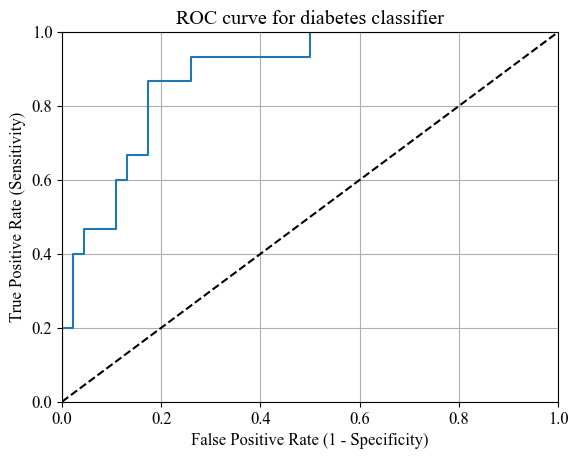

In [671]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)

# set the range for the plot
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="0")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'times new roman' 
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [672]:
auc(fpr, tpr)

0.8840579710144928

AUC (Area Under the Curve) = .86 which is in the good range. 

Permutation importance

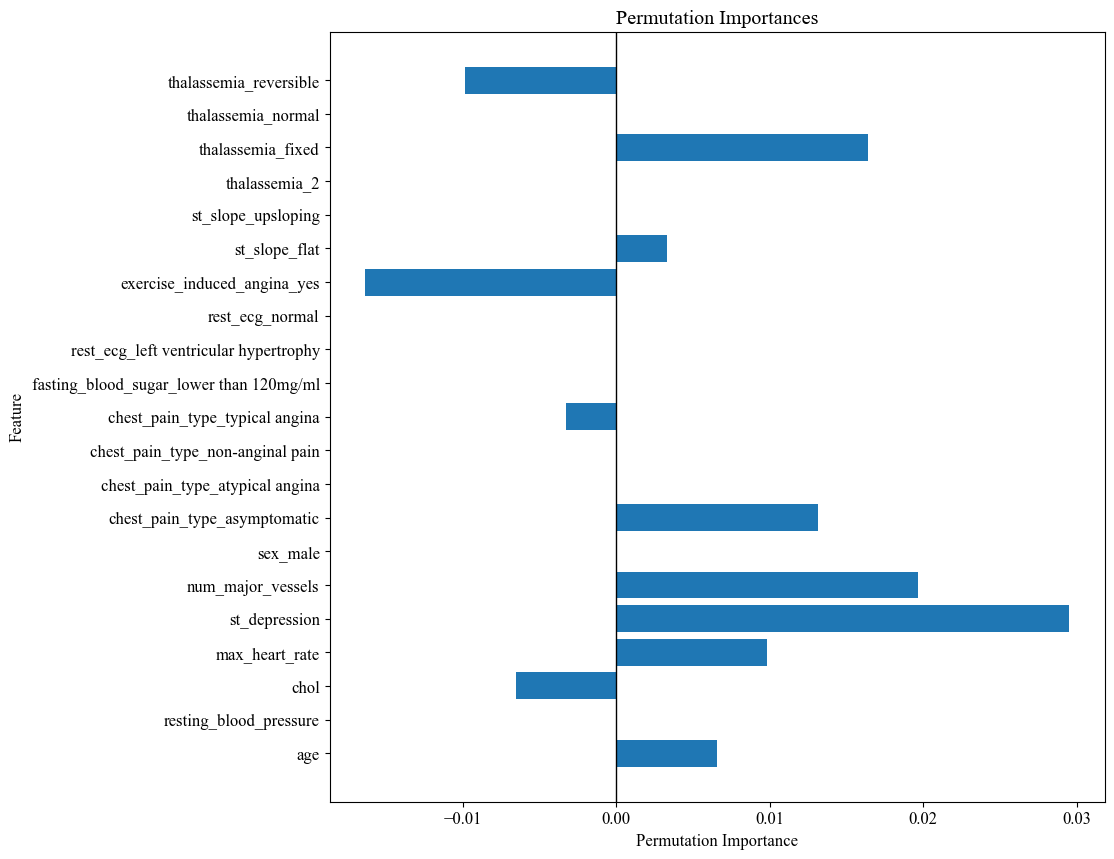

In [673]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names=X_test.columns.tolist())

feature_names = X_test.columns.tolist()
importances = perm.feature_importances_

plt.figure(figsize=(10, 10))
plt.axvline(x=0, color='black', linewidth=1)
plt.barh(feature_names, importances)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances')
plt.show()


Based off of this it seems like the most important factors are max_heart_rate and st_depression. Max heart rate would make sense as generally higher heart rates can be an indicator of heart disease. ST depression is the downward deflection in the ECG. It is one key indicator of heart disease. 

Features such as sex_male, rest_ecg_normal, and chest_pain_type_typical_angina seem to have no importance.

Partial Dependence Plot